<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/14thAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
#Problem 1
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib_inline 
iris= load_iris()

X = pd.DataFrame(iris.data, columns= iris.feature_names)
X.head()
y  = pd.DataFrame(iris.target, columns= (['species']))
y.head()
df = pd.concat([X, y], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
h1


,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


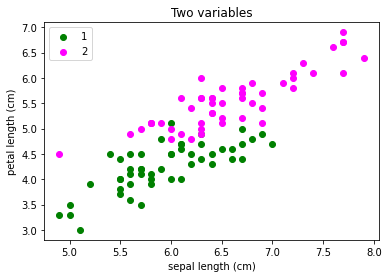

In [262]:
## Problem 2-a
colors = ['green', 'magenta']
species = [1, 2]
for i in range(2):
  x = h1[h1['species'] == species[i]]
  plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c = colors[i], label = species[i])
  plt.xlabel("sepal length (cm)")
  plt.ylabel("petal length (cm)")
  plt.title('Two variables')
  plt.legend()

{'boxes': [<matplotlib.lines.Line2D at 0x7f6c1225eb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6c126379d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c12649a10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c12649190>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6c1225e450>,
  <matplotlib.lines.Line2D at 0x7f6c126b3610>]}

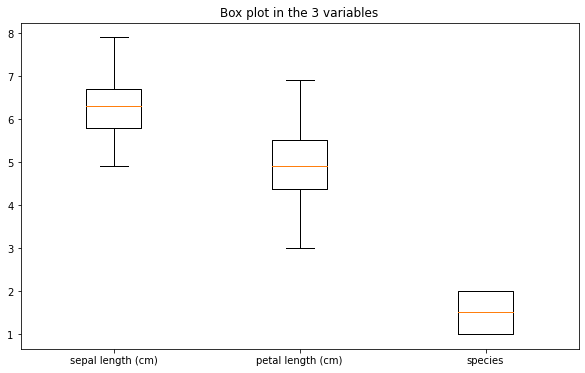

In [263]:
#Problem 2-b
#import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Box plot in the 3 variables')
plt.boxplot(h1.values, labels=['sepal length (cm)', 'petal length (cm)', 'species'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f6c12d5d250>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f6c12ab69d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f6c125f9cd0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f6c12ab67d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f6c12ab65d0>}

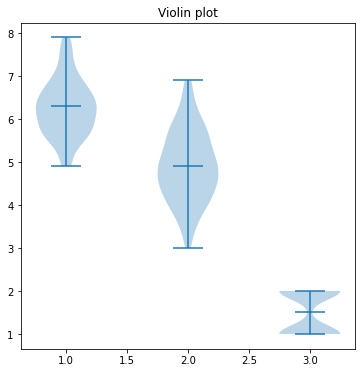

In [264]:
## Problem 2-c
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Violin plot')
plt.violinplot(h1.values, showmedians= True)

In [265]:
## Probelm 3
from sklearn.model_selection import train_test_split
# train 75%
# test 25%
X = h1.drop(columns=['species'])
Y = h1['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state= 42)

In [266]:
## Problem 4
from sklearn.preprocessing import StandardScaler
x_train_transf = scaler.fit_transform(x_train)
x_test_transf = scaler.fit_transform(x_test)

In [267]:
## Problem 5
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [268]:
model.fit(x_train_transf, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [269]:
print(model.predict(x_test_transf))
preds = model.predict(x_test_transf)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2]


In [270]:
print(model.predict_proba(x_test_transf))

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.         1.        ]]


In [271]:
## Problem 6
# Print metric to get performance 
print("accuracy:", round(model.score(x_test_transf, y_test)*100))

accuracy: 88


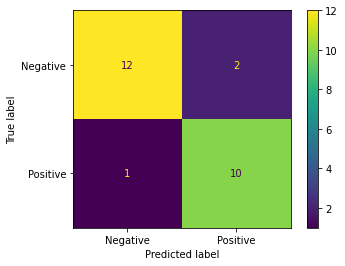

In [272]:
# Print metric to get performance
from sklearn.metrics import precision_score
from sklearn import metrics
preds = model.predict(x_test_transf)
metrics.plot_confusion_matrix(model, x_test_transf, y_test, display_labels=['Negative', 'Positive'])

In [273]:
## Confusion Matrix
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([12,  2,  1, 10])

In [274]:
## Accuracy Measure
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.88

In [275]:
## Precision Measure
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=2)
precision_positive, precision_negative


(0.9230769230769231, 0.8333333333333334)

In [276]:
## Recall 
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_spesificity = metrics.recall_score(y_test, preds, pos_label=2)
recall_sensitivity, recall_spesificity

(0.8571428571428571, 0.9090909090909091)

In [277]:
## F1-score Measure
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=2)
f1_negative, f1_positive


(0.8695652173913043, 0.888888888888889)

In [278]:
## Problem 7
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.patches as mpatches
import seaborn as sns



(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

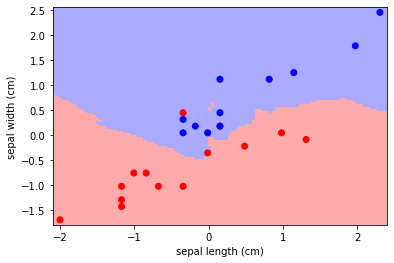

In [279]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
iris= load_iris()

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)


knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_test_transf, y_test)

x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')


(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

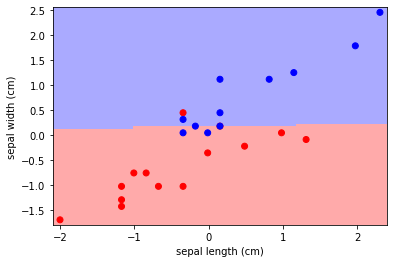

In [280]:
## Problem 8-a
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_test_transf, y_test)

x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [281]:
# Print metric to get performance 
print("accuracy:", round(model.score(x_test_transf, y_test)*100))

accuracy: 84


(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

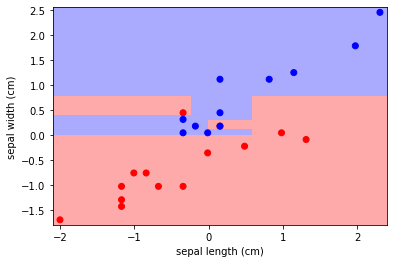

In [282]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_test_transf, y_test)

x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [286]:
# Model training
model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [287]:
# Print metric to get performance 
print("accuracy:", round(model2.score(x_train, y_train)*100))

accuracy: 100


(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

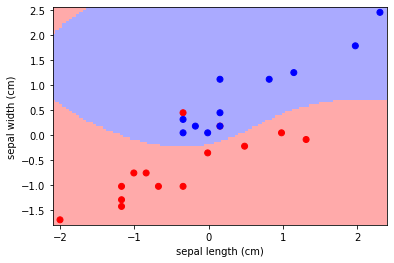

In [288]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_test_transf, y_test)
x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

(-2.1002193246999092,
 2.404888493362811,
 -1.7940838530506291,
 2.5607104068045548)

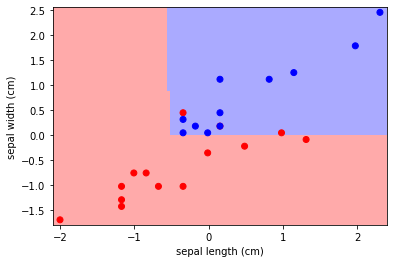

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)
y = h1.iloc[:, 2]

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(x_test_transf, y_test)
x_min, x_max = x_test_transf[:, 0].min() - .1, x_test_transf[:, 0].max() + .1
y_min, y_max = x_test_transf[:, 1].min() - .1, x_test_transf[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test_transf[:, 0], x_test_transf[:, 1], c=y_test, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

From the results of the models, it can be seen that the Training model as the highest accuracy. From the learning by other methods SVC gives the us the better results from the illustrated graphs. The standardised values offer better segmentation when compared to unstandardised data. 

In [ ]:
## Problem 9

(4.2, 8.0, 0.9, 7.0)

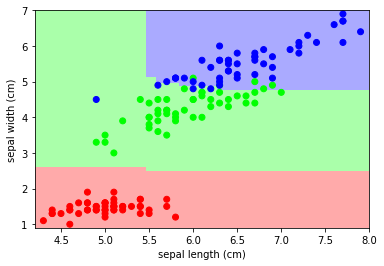

In [290]:
## Problem 10

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
X =pd.concat([i, k], axis=1)
y = df1.iloc[:, 2]

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X, y)
x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')